# Part II - (Fordbike Data Analysis)
## by (John Fashola)

## Investigation Overview

> In this investigation, i want to undestand or derieve how duration sec, gender and age affects the number of trips and the duration of trips 


## Dataset Overview

> This data contains information about fordbike system data convering Sans Francisco Bay area. There are 183,412 rides with columns such as duration_sec, bike_id, user_type, member_birth_year, member_gender, bike sharing for all trip et cetera.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
fordbike= pd.read_csv('201902-fordgobike-tripdata.csv')

In [18]:
# Make a copy of every data
fb_clean = fordbike.copy()

In [19]:
# Data wrangling

#Drop data with missing values
fb_clean.dropna(inplace=True)

#Convert the start and end time column to Date Time
fb_clean.start_time = pd.to_datetime(fb_clean.start_time)
fb_clean.end_time = pd.to_datetime(fb_clean.end_time)

fb_clean.bike_id = fb_clean.bike_id.astype(str)

fb_clean["start_hour"] = fb_clean["start_time"].dt.hour
fb_clean["start_day"] = fb_clean["start_time"].dt.day_name()
fb_clean["start_month"] = fb_clean["start_time"].dt.month_name()
fb_clean["start_year"] = fb_clean["start_time"].dt.year
fb_clean["start_year"] = fb_clean["start_time"].astype(str)

fb_clean["end_hour"] = fb_clean["end_time"].dt.hour
fb_clean["end_day"] = fb_clean["end_time"].dt.day_name()
fb_clean["end_month"] = fb_clean["end_time"].dt.month_name()
fb_clean["end_year"] = fb_clean["end_time"].dt.year
fb_clean["end_year"] = fb_clean["end_time"].astype(str)

# A sublot of pie chart and bar chart

From the pie chart and bar chart shown below, it is seen that 91% of riders are subscribers while 9% are customers.

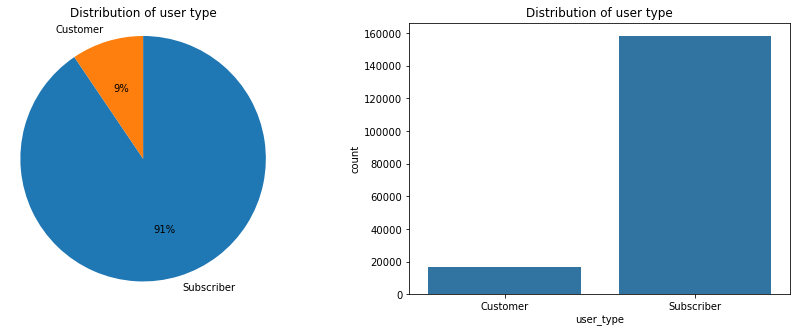

In [20]:
# A sublot of pie chart and bar chart
def pie_bar_plot():
   plt.figure(figsize=[15,5]);

   # Pie chart on the left
   plt.subplot(1,2,1);
   sorted_user = fb_clean.user_type.value_counts();
   plt.pie(sorted_user, labels=sorted_user.index, startangle=90,autopct='%1.0f%%', counterclock=False);
   plt.axis("square");
   plt.title("Distribution of user type");

   # Barplot on the right
   plt.subplot(1,2,2);
   base_color = sb.color_palette()[0]
   sb.countplot(data=fb_clean, x="user_type", color=base_color);
   plt.title("Distribution of user type");

pie_bar_plot()

# Top 10 start station with the most trips

It is observed that the Market St at 10th St station has the highest count for where trips started.

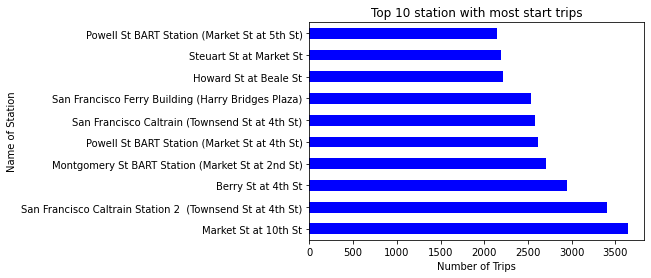

In [21]:
fb_clean.groupby('start_station_name').agg('count')['bike_share_for_all_trip'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')
plt.xlabel('Number of Trips')
plt.ylabel('Name of Station')
plt.title('Top 10 station with most start trips');

# Top 10 end station with the most trips

It is observed that the **San Francisco Caltrain Station 2** has the highest count for the station where trips ended.

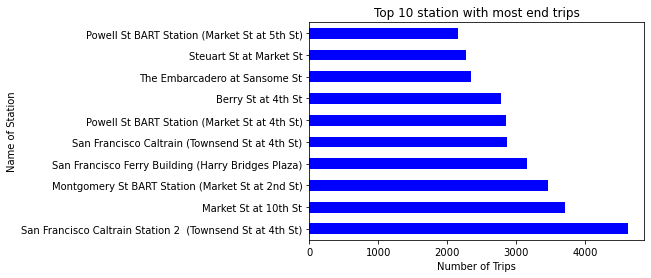

In [22]:
fb_clean.groupby('end_station_name').agg('count')['bike_share_for_all_trip'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')
plt.xlabel('Number of Trips')
plt.ylabel('Name of Station')
plt.title('Top 10 station with most end trips');

# Distribution of ride frequency by gender 
This is a distribution bar chart of the comoon Gender among the rider and From the bar chart above, it is Deduced that the gender male gender is common among the rider compared to the female and other genders.

i.e Most of the riders are Males

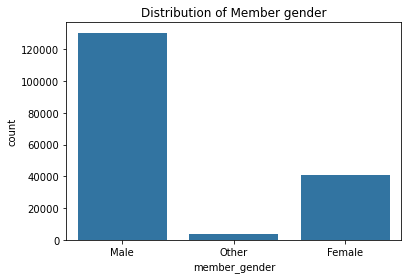

In [23]:
# Distribution of ride frequency by gender 
ax = sb.countplot(data=fb_clean, x="member_gender", color=sb.color_palette()[0])
total=len(fb_clean)
for a in ax.patches:
    percentage = "{:2f}%".format(100 * a.get_height()/total)
    x = a.get_height()+ a.get_width()/2
    y = a.get_height()+0.8
    ax.annotate(percentage, (x, y), ha="center")
    plt.title("Distribution of Member gender");

# Relationship between user type and duration
From the chart, more customers spent more time riding compared to subscribers

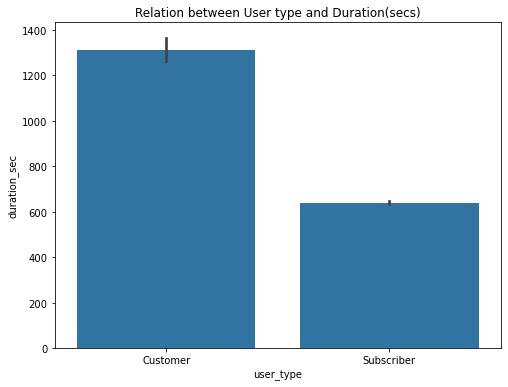

In [24]:
# Relationship between user type and duration
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[0]
sb.barplot(data=fb_clean, x="user_type", y="duration_sec", color=base_color)
plt.title("Relation between User type and Duration(secs)");

# Relationship between user type and gender
This is a  Bivariate visualization of relationship between the user type and member gender, 
From the visualization, it has been deduced that males are higher in all user type, there are more males in customer type as well as subscribers type

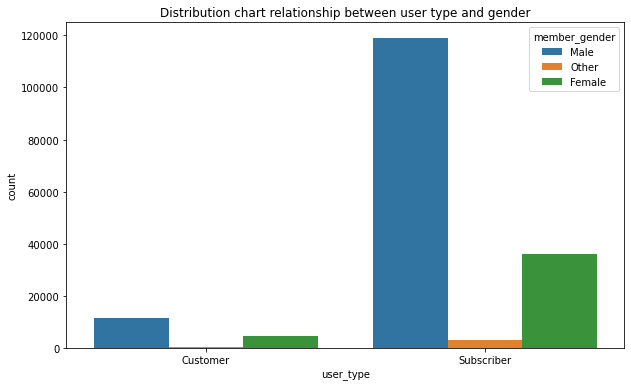

In [25]:
# Relationship between user type and gender
plt.figure(figsize=[10,6])
sb.countplot(data=fb_clean, x="user_type", hue="member_gender");
plt.title("Distribution chart relationship between user type and gender");

# A Clustered bar chart of member age, duration sec and user type
The other gender(customers and subscribers) travelled the longest duration, Followed by females then males.

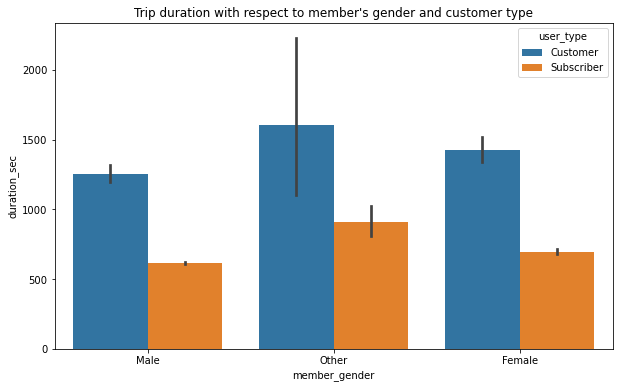

In [26]:
# clustered bar chart of member age, duration sec and user type
plt.figure(figsize=[10,6])
ax = sb.barplot(data=fb_clean, x="member_gender", y="duration_sec", hue="user_type")
plt.title("Trip duration with respect to member's gender and customer type");

# Point plot of start day, duration sec and user type

From this multivariate plot, customers travel longes distance compared to subscribers for all days of the week. While subscribes generally travel lower distance.

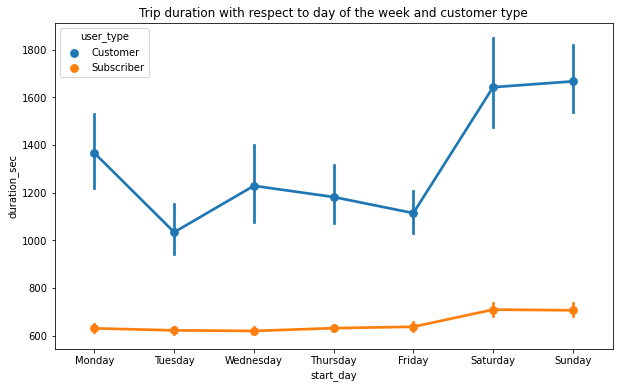

In [27]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[10,6])
ax = sb.pointplot(data=fb_clean, order= days_of_week, x="start_day", y="duration_sec", hue="user_type")
plt.title("Trip duration with respect to day of the week and customer type");

In [28]:
!jupyter nbconvert Fordbike_analysis_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Fordbike_analysis_2.ipynb to slides
[NbConvertApp] Writing 770634 bytes to Fordbike_analysis_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\